## Importing the necessary libraries for the  data cleaning and the visualisation
# I will mark the matplotlib library as inline so as to produce a visualization output on the cell itself

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [2]:
#Reading the data and storing it as a DataFrame using a variable "df"

df = pd.read_csv("data\kc_house_data.csv")

In [3]:
# Confirming the info of all the columns in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Finding out whether there are missing values in the DataFrame
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# dropping unecessary columns

df_dropped = df.drop(columns=['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'])
display(df_dropped)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,47.5944,-122.299
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004,47.5345,-122.069


In [7]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [8]:
df_dropped.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

# In the following cell i will replace the  missing values of the "waterfront" with the mode thats "0.0"
# I will then print the head of the Dataframe to confirm that the change has taken effect

In [9]:
df_dropped.waterfront.fillna(0, inplace=True)
display(df_dropped.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045


In [10]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [11]:
df_dropped.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

### In the cells below i will import the important libraries for the statistical analysis and interactive visualization especiallly done by the "seaborn" library.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

### I will the write a for loop for the visualisation of the graphs of correlation of every column factor against the price factor pon the y-axis

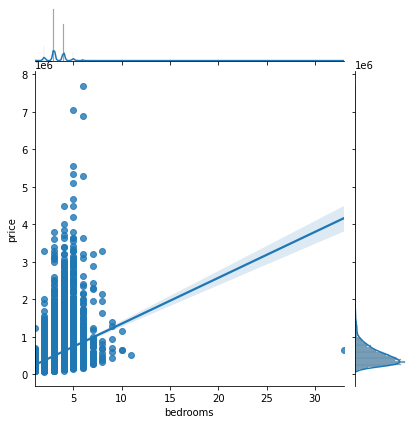

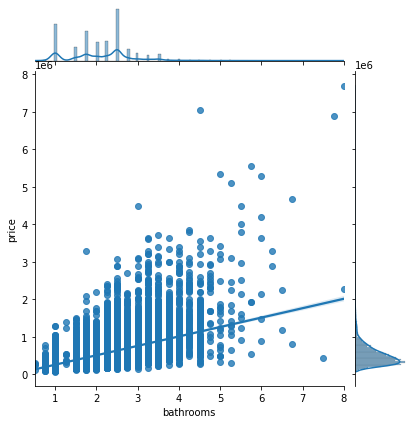

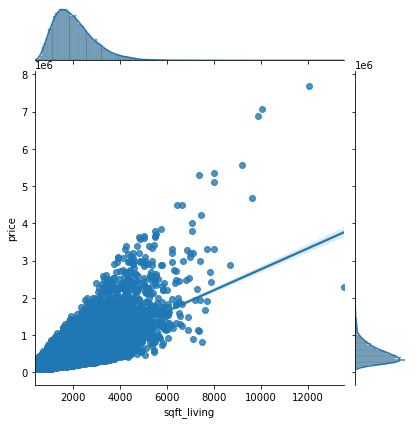

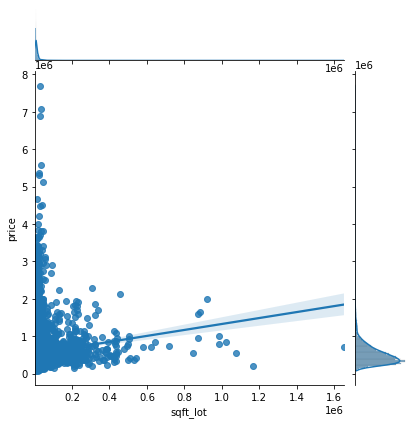

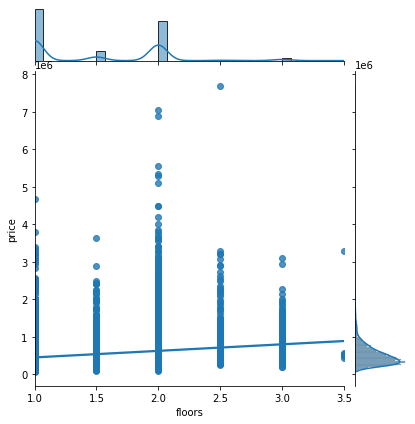

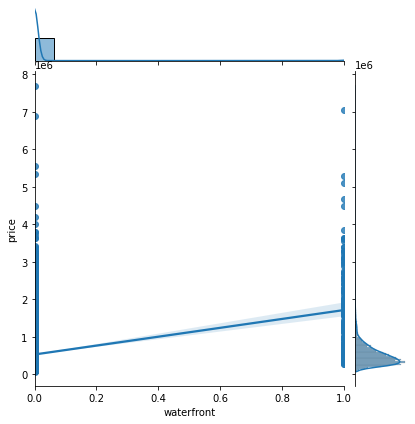

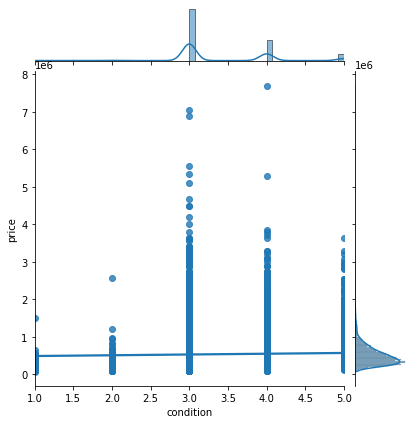

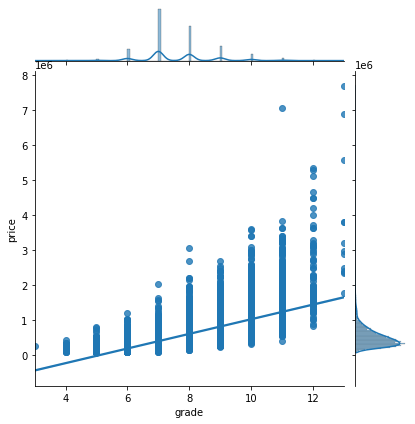

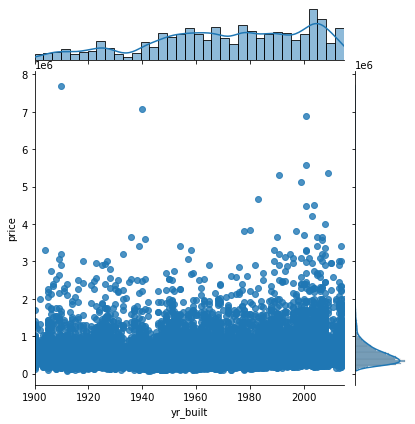

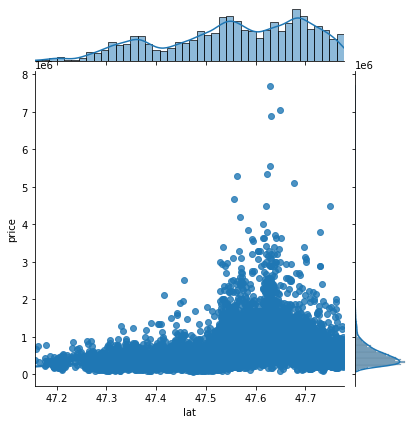

In [ ]:
for col_name in df_dropped.columns[1:]:
    ax = sns.jointplot(x=col_name, y='price', data=df_dropped, kind='reg');
    

From the above illustration grade and sqft_living have the highest impact on price

In [ ]:
# in this cell i will print the ouput of all the column labels minus the price labe
outcome = 'price'
x_cols = list(df_dropped.columns)
x_cols.remove(outcome)
print(x_cols)

In [ ]:
predictors = sm.add_constant(df_dropped.drop('price',1))
model_6 = sm.OLS(df_dropped.price, predictors).fit()
model_6.summary()

In [ ]:
PRICE = np.log(df_dropped.price)
PRICE = pd.DataFrame(PRICE)

X1= df_dropped.drop('price', 1)
y1= PRICE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [ ]:
#normalization
for col in x_cols:
    X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
display(X_train.head())
print(len(X_train), len(X_test))

## In the cell below i will use the ols regression and will the print the regression results as the output

In [ ]:
predictors = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, predictors).fit()
model_1.summary()

In [ ]:
## In this cell i will do a visualisation to determine the relationship
## of the sample quantiles and the Theoritical quantiles

fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)

#use the regression for the train and test data
y_hat_train = regression.predict(X_train)
y_hat_test = regression.predict(X_test)

#Root Mean Square Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print(f'Train Root Mean Square Error: {train_rmse}')
print(f'Test Root Mean Square Error: {test_rmse}')

Model 2

In [ ]:
# An histogram of the distribution of the "Square foot lot"

df_dropped.sqft_lot.hist()

In [ ]:
# visualization of the distribution of the bedrooms using anhistogram

df_dropped.bedrooms.hist()

In [ ]:
# Calculating and printing the percentiles of the squarefoot lot
# from the 80th percentile to the 100th percentile


for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_dropped.sqft_lot.quantile(q=q)))

In [ ]:
# calculating and printing the percentile of the "bedrooms"
# from the 80th to the 100th percentile


for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_dropped.bedrooms.quantile(q=q)))

## In the next cells I will try and remove/ flashout the outliers and the print the ratio of removed outliers to 1

In [ ]:
original = len(df_dropped)
df_outlier_filter = df_dropped.copy()
df_outlier_filters = df_outlier_filter[df_outlier_filter.sqft_lot < 100000] # Subsetting to remove extreme outliers
print('Percent removed sqft_lot:', (original -len(df_outlier_filters))/original)

df_outlier_filters = df_outlier_filters[df_outlier_filters.bedrooms < 7] # Subsetting to remove extreme outliers
print('Percent removed bedrooms:', (original -len(df_outlier_filters))/original)

df_outlier_filter['price'] = np.log(df_outlier_filter['price'])

In [ ]:
 # perfoming the regression of the model and printing out the results
X2 = df_outlier_filter.drop('price', 1)
y2 = df_outlier_filter['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

predictors = sm.add_constant(X_train2)
model_2 = sm.OLS(y_train2, predictors).fit()
model_2.summary()

In [ ]:
# correlation visualisation between the sample quatile 
# and the Theoritical Quantiles

fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
regression2 = LinearRegression()
regression2.fit(X_train2, y_train2)

#use the regression for the train and test data
y_hat_train2 = regression2.predict(X_train2)
y_hat_test2 = regression2.predict(X_test2)

#Root Mean Square Error
train_rmse2 = np.sqrt(mean_squared_error(y_train2, y_hat_train2))
test_rmse2 = np.sqrt(mean_squared_error(y_test2, y_hat_test2))

print(f'Train Root Mean Square Error: {train_rmse2}')
print(f'Test Root Mean Square Error: {test_rmse2}')

Model 3

In [ ]:
our_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
corr = df_dropped[our_variables].corr()
corr

In [ ]:
# Heatmap showing the correlation behaviors

sns.heatmap(corr, center=0,annot = True)

In [ ]:
X3 = df_outlier_filter.drop(columns=['price','grade','bathrooms'], axis=1)
y3 = df_outlier_filter['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train3)
model_3 = sm.OLS(y_train3, predictors).fit()
model_3.summary()

In [ ]:
# Visualisation
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
regression3 = LinearRegression()
regression3.fit(X_train3, y_train3)

#use the regression for the train and test data
y_hat_train3 = regression3.predict(X_train3)
y_hat_test3 = regression3.predict(X_test3)

#Root Mean Square Error
train_rmse3 = np.sqrt(mean_squared_error(y_train3, y_hat_train3))
test_rmse3 = np.sqrt(mean_squared_error(y_test3, y_hat_test3))

print(f'Train Root Mean Square Error: {train_rmse3}')
print(f'Test Root Mean Square Error: {test_rmse3}')

### I will the use a diffent model to compare the aproach of the resuls

In [ ]:
# In this cell i will use a for loop across all the columns
# to print the skewness of each and every column

for col_name in df_outlier_filter.columns[1:]:
    print(col_name)
    print(df_outlier_filter[col_name].skew())

In [ ]:
# I will then calculate and print out the skewness
# of the "squarefoot lot" column 
df_outlier_filter['sqft_lot'] = np.log(df_outlier_filter['sqft_lot'])
df_outlier_filter['sqft_lot'].skew()

In [ ]:
df_outlier_filter['sqft_lot'].hist()

In [ ]:
df_outlier_filter['bedrooms'] = np.log(df_outlier_filter['bedrooms'])
df_outlier_filter['bedrooms'].skew()

In [ ]:
X4 = df_outlier_filter.drop(columns=['price'], axis=1)
y4 = df_outlier_filter['price']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train4)
model_4 = sm.OLS(y_train4, predictors).fit()
model_4.summary()

In [ ]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
regression4 = LinearRegression()
regression4.fit(X_train4, y_train4)

#use the regression for the train and test data
y_hat_train4 = regression4.predict(X_train4)
y_hat_test4 = regression4.predict(X_test4)

#Root Mean Square Error
train_rmse4 = np.sqrt(mean_squared_error(y_train4, y_hat_train4))
test_rmse4 = np.sqrt(mean_squared_error(y_test4, y_hat_test4))

print(f'Train Root Mean Square Error: {train_rmse4}')
print(f'Test Root Mean Square Error: {test_rmse4}')

In [ ]:
model_4.params[1:].sort_values(ascending=False).plot.bar(color=['blue','blue','blue','blue','blue','blue','blue','red','red','red']);

In [ ]:
X_final = df_outlier_filter.drop(columns=['price'], axis=1)
y_final = df_outlier_filter['price']

predictors = sm.add_constant(X_final)
model_final = sm.OLS(y_final, predictors).fit()
model_final.summary()

In [ ]:
regression_final = LinearRegression()
regression_final.fit(X_final, y_final)

y_hat_final = regression_final.predict(X_final)
rmse_final = np.sqrt(mean_squared_error(y_final, y_hat_final))

print(f'Test Root Mean Square Error: {rmse_final}')

## According my study I then prefer the last model i used as the most efficient for this analysis